Understanding and Predicting Employee Turnover in IBM HR Analytics Dataset - done by Deepank G

In [235]:
#Importing required libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import collections as c
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.feature_selection import RFE
from sklearn import tree
from imblearn.over_sampling import SMOTE

In [2]:
#Reading the dataset
data = pd.read_csv("EmployeeAttrition.csv")
print("No. of columns in the dataset: ", data.shape[1])
print("No. of rows in the dataset: ", data.shape[0])

No. of columns in the dataset:  35
No. of rows in the dataset:  1470


In [3]:
#Understanding the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
#Preprocessing the data
#Dropping unimportant columns
columns = ["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"]
data.drop(columns, inplace=True, axis=1)

In [6]:
data.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [7]:
#One-hot encoding
df = data 
#BusinessTravel
df['BusinessTravel']=df['BusinessTravel'].astype('category')
dummies=pd.get_dummies(df['BusinessTravel'],prefix='BusinessTravel')
df = pd.concat([df, dummies], axis=1)
del df['BusinessTravel']

#Departments
df['Department']=df['Department'].astype('category')
dummies=pd.get_dummies(df['Department'],prefix='Department')
df = pd.concat([df, dummies], axis=1)
del df['Department']

# Education Field
df['EducationField']=df['EducationField'].astype('category')
dummies=pd.get_dummies(df['EducationField'],prefix='EducationField')
df = pd.concat([df, dummies], axis=1)
del df['EducationField']

# Gender
df['Gender']=df['Gender'].astype('category')
dummies=pd.get_dummies(df['Gender'],prefix='Gender')
df = pd.concat([df, dummies], axis=1)
del df['Gender']

# JobRole
df['JobRole']=df['JobRole'].astype('category')
dummies=pd.get_dummies(df['JobRole'],prefix='JobRole')
df = pd.concat([df, dummies], axis=1)
del df['JobRole']

In [8]:
#Label Encoding
#Overtime
df['OverTime']=df['OverTime'].replace(['No','Yes'], [0,1])

#Marital Status
df['MaritalStatus']=df['MaritalStatus'].replace(['Divorced','Single','Married'], [0,1,2])

#Attrition
df['Attrition']=df['Attrition'].replace(['Yes', 'No'], [1,0])
df['Attrition']=df['Attrition'].astype('category')

In [9]:
#Newly updated dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                1470 non-null   int64   
 1   Attrition                          1470 non-null   category
 2   DailyRate                          1470 non-null   int64   
 3   DistanceFromHome                   1470 non-null   int64   
 4   Education                          1470 non-null   int64   
 5   EnvironmentSatisfaction            1470 non-null   int64   
 6   HourlyRate                         1470 non-null   int64   
 7   JobInvolvement                     1470 non-null   int64   
 8   JobLevel                           1470 non-null   int64   
 9   JobSatisfaction                    1470 non-null   int64   
 10  MaritalStatus                      1470 non-null   int64   
 11  MonthlyIncome                      1470 non

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,...,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,1.235374,...,0.600000,0.089116,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,0.790757,...,0.490065,0.285008,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#Checking for imbalance in the dataset
(data['Attrition'].value_counts()/1470)*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

Attrition has highly imbalanced class. This will lead to a poor performance on the predicting the minority class.

EXPLORATORY DATA ANALYSIS:-

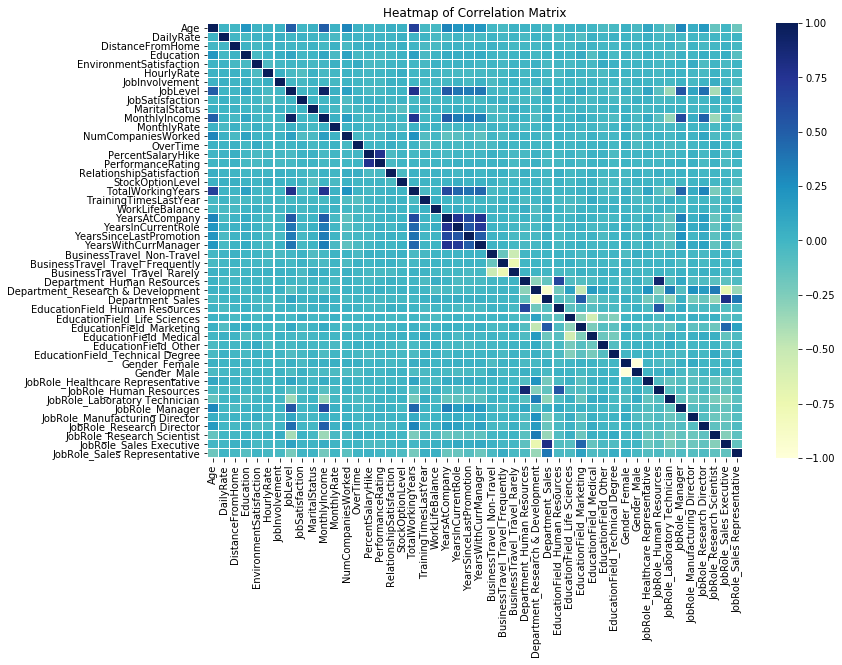

In [13]:
#Correlation Matrix
corr=df.corr()
plt.rcParams["figure.figsize"] = [12,8]
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            cmap="YlGnBu",linewidths=0.1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

Job Level, Monthly Income and Total Working Years appears to be highly correlated with Age.
Stock Option Level and Marital Status are negatively correlated.
Performance Rating is highly correlated with Percent Salary Hike.

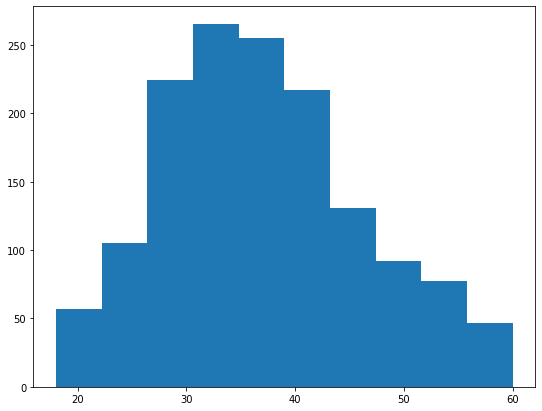

In [14]:
#Age Distribution
plt.rcParams["figure.figsize"] = [9,7]
plt.hist(df['Age'])
plt.show()

Age is normally distributed. The age group is concentrated between approximately 25-45 years here. This represents a young working force in the company.

Text(0.5, 1.0, 'Employee Satisfaction')

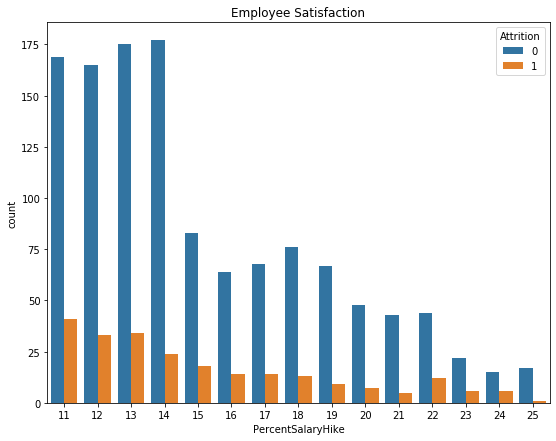

In [15]:
#Countplot of percentage salary hike as a factor of attrition
sns.countplot(x="PercentSalaryHike", hue="Attrition", data=df).set_title('Employee Satisfaction')

Text(0.5, 1.0, 'Performance Rating')

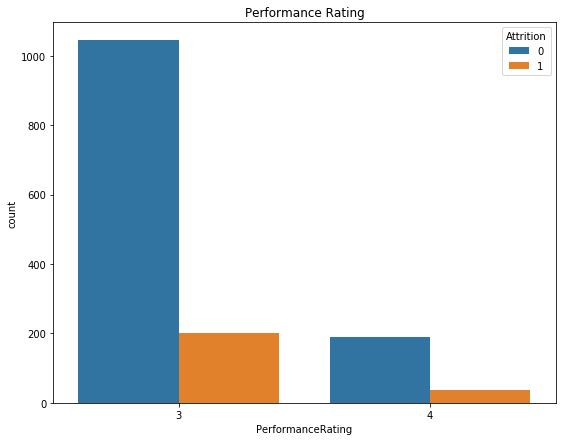

In [16]:
#Countplot of performance rating in terms of attrition
sns.countplot(x="PerformanceRating", hue="Attrition", data=df).set_title('Performance Rating')

Text(0.5, 1.0, 'Employee Job Involvement')

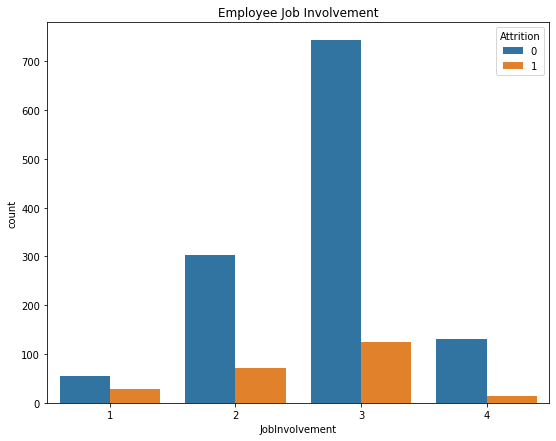

In [17]:
#Countplot of job involvement as a factor of attrition
sns.countplot(x="JobInvolvement", hue="Attrition", data=df).set_title('Employee Job Involvement')

In [18]:
#Comparison between gender and attrition
df.groupby(["Gender_Female", "Attrition"]).size()

Gender_Female  Attrition
0              0            732
               1            150
1              0            501
               1             87
dtype: int64

Males are more likely to stay or leave the company compared to females. 

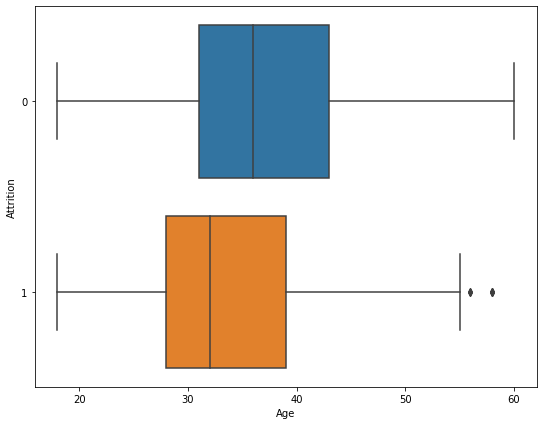

In [19]:
#Boxplot for understanding distribution of age as a factor of attrition
sns.boxplot(df['Age'],df['Attrition'])

Attrition is more common in the younger age groups. This is expected because there is typically no job security among older age groups and hence they may choose to remain in the company.

In [22]:
#Comparison of marital Status and Attrition
ms = df[df['Attrition']==1]
msleft = pd.DataFrame(ms.MaritalStatus.value_counts()).reset_index()
msstay = pd.DataFrame(df.MaritalStatus.value_counts()).reset_index()
ms_merge = pd.merge(msleft, msstay, how='inner', on='index')
ms_merge = ms_merge.rename(columns={"MaritalStatus_x":'Left', "MaritalStatus_y":'Stay', "index":'Marital Status'})
ms_merge

#Divorced:0 Single:1 Married:2

,Marital Status,Left,Stay
0,1,120,470
1,2,84,673
2,0,33,327


Singles are most likely to leave the company.

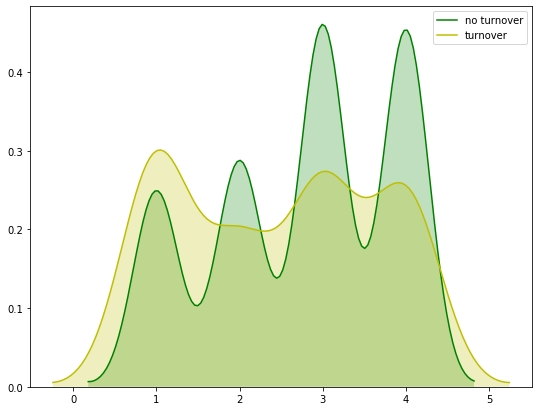

In [23]:
#Kernel Distribution Estimation Plot depicting the probability density of EnvironmentSatisfaction data in terms of attrition
pl=sns.kdeplot(df.loc[(df['Attrition']==0),'EnvironmentSatisfaction'],color='g',shade=True,label='no turnover')
pl=sns.kdeplot(df.loc[(df['Attrition']==1),'EnvironmentSatisfaction'],color='y',shade=True,label='turnover')

Employees who had satisfaction levels of lower than 2 left the company more. Employees with satisfaction level between 3 & 4 tend to stay at the company.

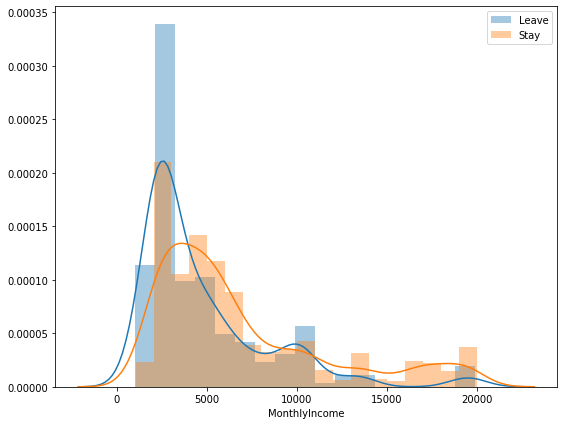

In [24]:
#Distribution plot of monthly income as a factor of attrition
sns.distplot(df['MonthlyIncome'][df['Attrition']==1])
sns.distplot(df['MonthlyIncome'][df['Attrition']==0])
plt.legend(labels = ['Leave','Stay'])
plt.show()

Employees whose salary is less than 2500/month are most likely to leave. It can also be seen that employees earning around
10000/month also tend to leave. This may be due to companies poaching top talents or employees leaving for greener pastures.

In [25]:
#Comparison of jobroles and attrition
dict = {}
roles = df.columns.values[40:49]
for i in roles:
    dict[i] = c.Counter(df[i][df['Attrition']==1])[1]
dict

{'JobRole_Healthcare Representative': 9,
 'JobRole_Human Resources': 12,
 'JobRole_Laboratory Technician': 62,
 'JobRole_Manager': 5,
 'JobRole_Manufacturing Director': 10,
 'JobRole_Research Director': 2,
 'JobRole_Research Scientist': 47,
 'JobRole_Sales Executive': 57,
 'JobRole_Sales Representative': 33}

Laboratory technicians are among the most to leave the company. Research Directors tend to stay in the company.

In [26]:
#Comparison of employee department as a factor of attrition
left,stay = [],[]
dept = df.columns.values[29:32]
for i in dept:
    left.append(c.Counter(df[i][df['Attrition']==1])[1])
    stay.append(c.Counter(df[i][df['Attrition']==0])[1])
dval = {'Dept':dept, 'Left':left, 'Stay':stay}
pdf = pd.DataFrame(dval)

                                Dept  Left  Stay
0         Department_Human Resources    12    51
1  Department_Research & Development   133   828
2                   Department_Sales    92   354


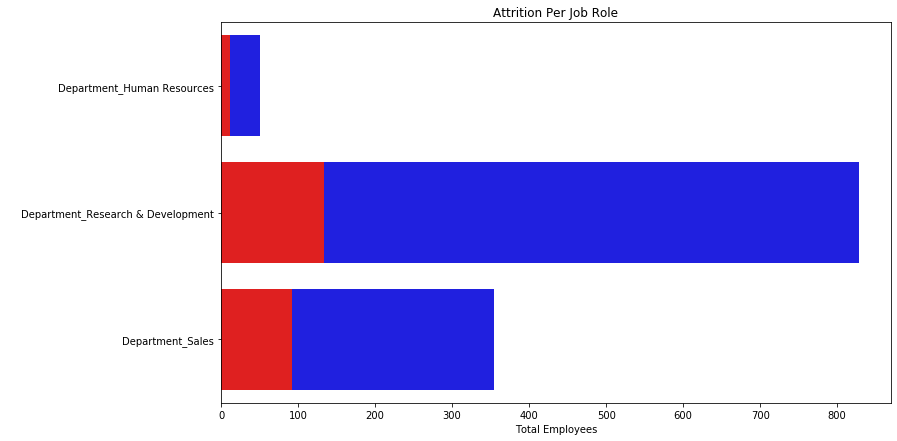

In [27]:
#Visualization
print(pdf)
plt.subplots(figsize=(12, 7))
ax = sns.barplot(x="Stay", y='Dept', data=pdf, label="Stay", color="b")
ax = sns.barplot(x="Left", y='Dept', data=pdf, label="Left", color="r")
ax.set(title='Attrition Per Job Role',xlabel="Total Employees", ylabel=" ")
plt.show()

Employees in R&D department are most likely to leave the company. This could be due to more work pressure in R&D department.
HR department employees tend to stay in the company. They could be happy with their current role at the company.

Building Predictive Models:

In [135]:
#Splitting the dataset
y = df['Attrition']
df.drop(["Attrition"], axis=1, inplace=True)
X = df

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.70, random_state=42)

Splitting the dataset into train and test data in the ratio of 70:30.

In [136]:
#Standardization of the features
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)

Feature normaliation of training and test data, increases the accuracy and performance of our models, as it has a mean = 0 and standard deviation = 1

LOGISTIC REGRESSION MODEL

In [137]:
#Crossvalidation
kfold = model_selection.KFold(n_splits=5)
logreg = LogisticRegression()
results = model_selection.cross_val_score(logreg, xtrain, y_train, cv=kfold, scoring='accuracy')
print("5-fold cross validation average accuracy: %.4f" % (results.mean()))

5-fold cross validation average accuracy: 0.8663


Using k-fold cross validation technique to estimate the skills of the model on new data.

In [221]:
#Accuracy of the model
logreg.fit(xtrain, y_train)
y_pred = logreg.predict(xtest)
print("Logistic Regression Accuracy: ",accuracy_score(y_test, y_pred))

Logistic Regression Accuracy:  0.8483965014577259


Logistic regression shows better accuracy on normally distributed data (although its imbalanced (more about it below)).

In [161]:
#Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix: \n", cm)
print(classification_report(y_test, y_pred))

Confusion Matrix: 
 [[811  57]
 [ 99  62]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       868
           1       0.52      0.39      0.44       161

    accuracy                           0.85      1029
   macro avg       0.71      0.66      0.68      1029
weighted avg       0.83      0.85      0.84      1029



ROC AUC: 0.660


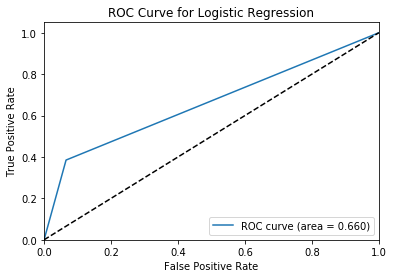

In [179]:
#Plotting RUC (Reciever Operating Characteristic)
fpr, tpr, _ = roc_curve(y_test, y_pred)
 
# Calculating the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [233]:
#Feature Selection in logistic regression using RFE
rfe = RFE(logreg, n_features_to_select=5)
fit = rfe.fit(xtrain, y_train)
print("Num Features: "+str(fit.n_features_))
print("Selected Features: "+str(fit.support_))
X_train.columns[fit.support_]

Num Features: 5
Selected Features: [False False False False False False False False False False False False
  True False False False False False  True False False  True  True False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False]


Index(['NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'JobRole_Research Director'],
      dtype='object')

Feature selection done using RFE (recursive feature elimination) on logistic regression model.
NumCompaniesWorked, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole and JobRole_Research Director are important features according to this model.

Handling the imbalance in data using SMOTE (synthetic minority oversampling technique) library.

In [140]:
#Handling imbalance using SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

sm = SMOTE(random_state=2,k_neighbors=9) 
X_train_res, y_train_res = sm.fit_sample(xtrain, y_train.ravel()) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 76
Before OverSampling, counts of label '0': 365 

After OverSampling, the shape of train_X: (730, 48)
After OverSampling, the shape of train_y: (730,) 

After OverSampling, counts of label '1': 365
After OverSampling, counts of label '0': 365


This oversampling technique works well on models like decision trees and random forest where data distribution is not relevant.

DECISION TREE MODEL

In [148]:
#Crossvalidation
kfold = model_selection.KFold(n_splits=5)
dtc = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                                  max_depth=3, min_samples_leaf=5)
result = model_selection.cross_val_score(dtc, X_train_res, y_train_res, cv=kfold, scoring='accuracy')
print("5-fold cross validation average accuracy: %.4f" % (result.mean()))

5-fold cross validation average accuracy: 0.7425


In [220]:
#Accuracy of the model
dtc.fit(X_train_res, y_train_res)
prediction = dtc.predict(xtest)
print("Decision Tree Accuracy: ", accuracy_score(y_test, prediction))

Decision Tree Accuracy:  0.8124392614188533


Accuracy of the DT model appears to be very less because the dataset here contains many columns due to one-hot encoding and this leads to more nodes and branches. This affects the accuracy and performance of the model. Lesser the nodes and branches, the better.

In [172]:
#Confusion matrix and classification report
cmdt = confusion_matrix(y_test, prediction) 
print ("Confusion Matrix: \n", cmdt)
print(classification_report(y_test, prediction))

Confusion Matrix: 
 [[765 103]
 [ 90  71]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       868
           1       0.41      0.44      0.42       161

    accuracy                           0.81      1029
   macro avg       0.65      0.66      0.66      1029
weighted avg       0.82      0.81      0.82      1029



In [188]:
#Feature importance in DT model
featureimp = pd.DataFrame(dtc.feature_importances_, index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
featureimp = featureimp.reset_index()
featureimp[featureimp['importance']>0]

,index,importance
0,OverTime,0.644096
1,JobLevel,0.196943
2,EducationField_Technical Degree,0.122729
3,JobInvolvement,0.036232


OverTime, JobLevel, EducationField_Technical Degree and JobInvolvement are important features according to this model.

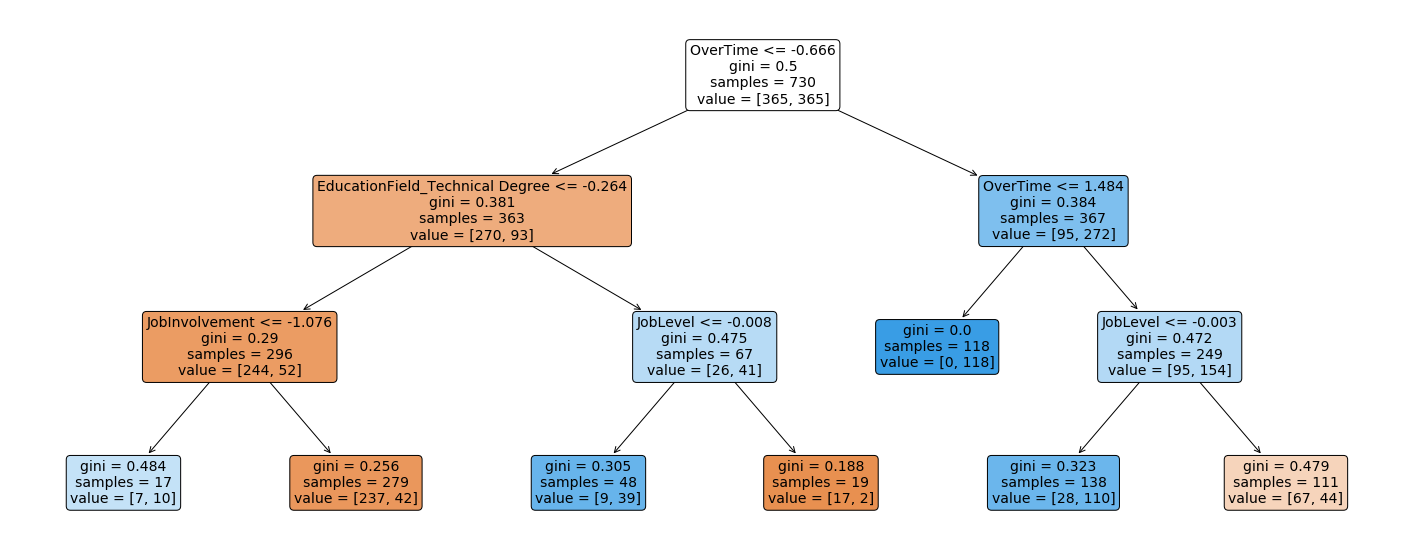

In [283]:
#Plotting the decision tree
plt.figure(figsize=(25,10))
a = tree.plot_tree(dtc,feature_names=X_train.columns,filled=True,rounded=True,fontsize=14)

ROC AUC: 0.661


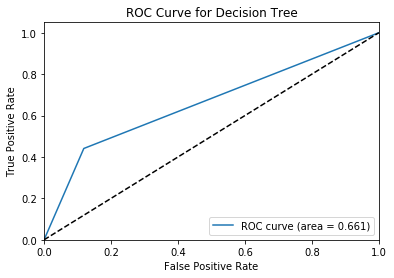

In [173]:
#Plotting ROC 
fpr, tpr, _ = roc_curve(y_test, prediction)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

RANDOM FOREST CLASSIFIER MODEL

In [174]:
#Crossvalidation
kfold = model_selection.KFold(n_splits=5)
rf = RandomForestClassifier()
res = model_selection.cross_val_score(rf, X_train_res, y_train_res, cv=kfold, scoring='accuracy')
print("5-fold cross validation average accuracy: %.4f" % (res.mean()))

5-fold cross validation average accuracy: 0.9452


In [204]:
#Accuracy of the model
rf.fit(X_train_res, y_train_res)
pred = rf.predict(xtest)
print("Random Forest Accuracy: ", accuracy_score(y_test, pred))

Random Forest Accuracy:  0.8688046647230321


In [205]:
#Confusion matrix and classification report
cmrf = confusion_matrix(y_test, pred) 
print ("Confusion Matrix: \n", cmrf)
print(classification_report(y_test, pred))

Confusion Matrix: 
 [[857  11]
 [124  37]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       868
           1       0.77      0.23      0.35       161

    accuracy                           0.87      1029
   macro avg       0.82      0.61      0.64      1029
weighted avg       0.86      0.87      0.84      1029



In [206]:
#Feature importance in RFC model
featureimp = pd.DataFrame(rf.feature_importances_, index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
featureimp = featureimp.reset_index()
featureimp[featureimp['importance']>0]

,index,importance
0,OverTime,0.086577
1,StockOptionLevel,0.059586
2,Age,0.055059
3,NumCompaniesWorked,0.049045
4,YearsInCurrentRole,0.045021
5,JobInvolvement,0.040221
6,MaritalStatus,0.034333
7,TotalWorkingYears,0.033955
8,YearsAtCompany,0.032433
9,WorkLifeBalance,0.031788


ROC AUC: 0.612


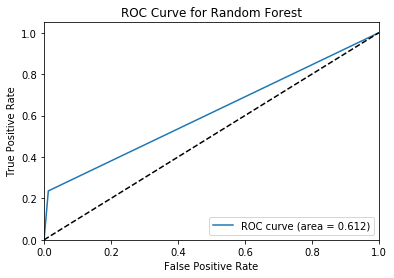

In [177]:
#Plotting ROC
fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()